<a href="https://colab.research.google.com/github/rbbh/ARIMA-SVR-PSO-ensemble/blob/master/30_Experiments_of_ARIMA_%2B_(SVR_%2B_PSO)_Val_Set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from sklearn import svm
from mpl_toolkits.mplot3d import axes3d, Axes3D
from google.colab import files

In [0]:
import io
import pandas as pd

In [0]:
uploaded = files.upload()   

Saving airlines2.txt to airlines2.txt


In [0]:
data = pd.read_csv(io.BytesIO(uploaded['airlines2.txt']))

In [0]:
uploaded = files.upload()

Saving airlines2_ARIMA.txt to airlines2_ARIMA.txt


In [0]:
data_ARIMA = pd.read_csv(io.BytesIO(uploaded['airlines2_ARIMA.txt']))

In [0]:
uploaded = files.upload()

Saving airlines2_r.txt to airlines2_r.txt


In [0]:
data_r = pd.read_csv(io.BytesIO(uploaded['airlines2_r.txt']))

In [0]:
data_r.describe()

,Residuo
count,144.000000
mean,2.832599
std,29.757948
min,-86.729834
25%,-15.400285
50%,0.233500
75%,24.658117
max,81.595276


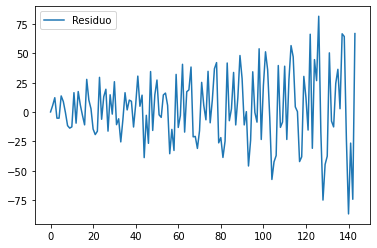

In [0]:
data_r.plot()

In [0]:
len(data)

144

In [0]:
#Scaling the data
from sklearn import preprocessing

data_r_n = data_r.copy()

data_r_n = (data_r - data_r.min())/(data_r.max() - data_r.min())

data_r_n = pd.DataFrame(data_r_n)



In [0]:
# TODO: Create function for the Lag used for the prediction
# We will use 12 for the lag dimension if the series repeats 
# itself annually, 3 if it is trimestrial etc.

# Note: For the "ONS" data base, make "dimensions" = 3
# NOTE: For the "Milk" data base, make "dimensions" = 24

dimensions = 12
data_cn = pd.concat([data_r_n.shift(i) for i in range(0 + dimensions + 1)], axis = 1)

print(data_cn)

      Residuo   Residuo   Residuo  ...   Residuo   Residuo   Residuo
0    0.515917       NaN       NaN  ...       NaN       NaN       NaN
1    0.548651  0.515917       NaN  ...       NaN       NaN       NaN
2    0.587900  0.548651  0.515917  ...       NaN       NaN       NaN
3    0.484460  0.587900  0.548651  ...       NaN       NaN       NaN
4    0.484363  0.484460  0.587900  ...       NaN       NaN       NaN
..        ...       ...       ...  ...       ...       ...       ...
139  0.376937  0.897451  0.911189  ...  0.250371  0.070000  0.413713
140  0.000000  0.376937  0.897451  ...  0.292054  0.250371  0.070000
141  0.358242  0.000000  0.376937  ...  0.814766  0.292054  0.250371
142  0.073976  0.358242  0.000000  ...  0.469495  0.814766  0.292054
143  0.912230  0.073976  0.358242  ...  0.440188  0.469495  0.814766

[144 rows x 13 columns]


In [0]:
# Splitting the residual data into train, validation and test

from sklearn.model_selection import train_test_split

X = data_cn.iloc[12:,1:]

y = data_cn.iloc[12:,0]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3939, shuffle = False)

X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size = 0.5384, shuffle = False)


print(len(y_val))
print(len(y_test))
print(len(y_train))


24
28
80


In [0]:
dimensions = 12
data_c2n = pd.concat([data_ARIMA.shift(i) for i in range(0 + dimensions + 1)], axis = 1)

print(data_c2n)

          ARIMA       ARIMA       ARIMA  ...       ARIMA       ARIMA       ARIMA
0    111.888000         NaN         NaN  ...         NaN         NaN         NaN
1    112.378158  111.888000         NaN  ...         NaN         NaN         NaN
2    119.771433  112.378158  111.888000  ...         NaN         NaN         NaN
3    134.183102  119.771433  112.378158  ...         NaN         NaN         NaN
4    126.199377  134.183102  119.771433  ...         NaN         NaN         NaN
..          ...         ...         ...  ...         ...         ...         ...
139  629.281833  557.666302  468.353843  ...  451.586191  537.947070  576.091574
140  594.729834  629.281833  557.666302  ...  399.569768  451.586191  537.947070
141  487.428775  594.729834  629.281833  ...  354.584335  399.569768  451.586191
142  464.277816  487.428775  594.729834  ...  424.702000  354.584335  399.569768
143  365.178562  464.277816  487.428775  ...  403.635172  424.702000  354.584335

[144 rows x 13 columns]


In [0]:
# Splitting the ARIMA predictions into train, validation and test

from sklearn.model_selection import train_test_split

X_ARIMA = data_c2n.iloc[12:,1:]

y_ARIMA = data_c2n.iloc[12:,0]

X_train_ARIMA, X_val_ARIMA, y_train_ARIMA, y_val_ARIMA = train_test_split(X_ARIMA, y_ARIMA, test_size = 0.3939, shuffle = False)

X_val_ARIMA, X_test_ARIMA, y_val_ARIMA, y_test_ARIMA = train_test_split(X_val_ARIMA, y_val_ARIMA, test_size = 0.5384, shuffle = False)

print(len(y_val_ARIMA))
print(len(y_test_ARIMA))
print(len(y_train_ARIMA))

24
28
80


In [0]:
dimensions = 12
data_c3n = pd.concat([data.shift(i) for i in range(0 + dimensions + 1)], axis = 1)

print(data_c3n)

       X      X      X      X      X  ...      X      X      X      X      X
0    112    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
1    118  112.0    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
2    132  118.0  112.0    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
3    129  132.0  118.0  112.0    NaN  ...    NaN    NaN    NaN    NaN    NaN
4    121  129.0  132.0  118.0  112.0  ...    NaN    NaN    NaN    NaN    NaN
..   ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
139  606  622.0  535.0  472.0  461.0  ...  405.0  362.0  407.0  463.0  559.0
140  508  606.0  622.0  535.0  472.0  ...  417.0  405.0  362.0  407.0  463.0
141  461  508.0  606.0  622.0  535.0  ...  391.0  417.0  405.0  362.0  407.0
142  390  461.0  508.0  606.0  622.0  ...  419.0  391.0  417.0  405.0  362.0
143  432  390.0  461.0  508.0  606.0  ...  461.0  419.0  391.0  417.0  405.0

[144 rows x 13 columns]


In [0]:
# Splitting the raw data into train, validation and test

from sklearn.model_selection import train_test_split

X_raw = data_c3n.iloc[12:,1:]

y_raw = data_c3n.iloc[12:,0]

X_train_raw, X_val_raw, y_train_raw, y_val_raw = train_test_split(X_raw, y_raw, test_size = 0.3939, shuffle = False)

X_val_raw, X_test_raw, y_val_raw, y_test_raw = train_test_split(X_val_raw, y_val_raw, test_size = 0.5384, shuffle = False)

print(len(y_val_raw))
print(len(y_test_raw))
print(len(y_train_raw))

24
28
80


In [0]:
def pso(n_particles, iterations, dimensions, inertia, k_best_particles, experiments):

    # Range of SVR's hyperparameters (Particles' search space)
    # C, Epsilon and Gamma
    max_c = 1e4
    min_c = 1e-3
    max_e = 1e-1
    min_e = 1e-8
    max_g = 1e3
    min_g = 1e-3
    

    # Initializing regression variables    
    p_best_RGS = np.empty((n_particles), dtype = object);
    g_best_RGS = sys.maxsize

    # Initializing variables for experiment collection
    g_bests = []
    g_bests_RGS_experiment = []
    mse_residuals = []
    final_experiment_predictions = []

    last_configurations = []
    
    average_particles = []
    mse_averages = []
    final_experiment_averages = []

    median_particles = []
    mse_medians = []
    final_experiment_medians = []

    average_k_best_predictions = []
    mse_averages_k_best = []
    final_experiment_k_averages = []

    median_k_best_predictions = []
    mse_medians_k_best = []
    final_experiment_k_medians = []
    
    mse_ARIMA = []
    mse_ensemble = []


    from sklearn.metrics import mean_squared_error

    for e in range(experiments):
      
        # Initializing particles' positions randomly, inside
        # the search space
        x = np.random.rand(n_particles, 1)*(max_c - min_c) + min_c
        y = np.random.rand(n_particles, 1)*(max_e - min_e) + min_e
        z = np.random.rand(n_particles, 1)*(max_g - min_g) + min_g

        c = np.concatenate((x,y,z), axis=1)

        if(e == 0):
            # Displaying tridimensional search space
            plot(c)

        # Initializing particles' parameters
        v = np.zeros((n_particles, dimensions))
        c1 = 2
        c2 = 2
        p_best = np.zeros((n_particles, dimensions))
        p_best_val = np.zeros(n_particles) + sys.maxsize  
        g_best = np.zeros(dimensions)
        g_best_val = sys.maxsize

        best_iter = np.zeros(iterations)

        for i in range(iterations):

            for j in range(n_particles):
              
                # Starting Regression
                rgs = svm.SVR(C = c[j][0], epsilon = c[j][1], gamma = c[j][2])

                # Fitting the curve
                rgs.fit(X_train, y_train)
                y_predict = rgs.predict(X_val)

                # Using Mean Squared Error to verify prediction accuracy
                mse = mean_squared_error(y_val, y_predict) 

                # If mse value for that search point, for that particle,
                # is less than its personal best point,
                # replace personal best
                if(mse < p_best_val[j]):   
                    # The value below represents the current least Mean Squared Error
                    p_best_val[j] = mse
                    
                    # The value below represents the current least Regressor
                    p_best_RGS[j] = rgs
                                

                    # The value below represents the current search coordinates for
                    # the particle's current least Mean Squared Error found
                    p_best[j] = c[j].copy()
                    
                # Using auxiliar variable to get the index of the
                # particle that found the configuration with the 
                # minimum MSE value
                aux = np.argmin(p_best_val)        
              
                if(p_best_val[aux] < g_best_val):
                    # Assigning Particle's current best MSE to the Group's best    
                    g_best_val = p_best_val[aux]

                    # Assigning Particle's current best configuration to the Group's best
                    g_best = p_best[aux].copy()

                    # Group best regressor:
                    # the combination of C, Epsilon and Gamma
                    # that computes the best fitting curve
                    g_best_RGS = p_best_RGS[aux]

              
                rand1 = np.random.random()
                rand2 = np.random.random()

                # The variable below influences directly the particle's velocity.
                # It can either make it smaller or bigger. 
                w = inertia

                # The equation below represents Particle's velocity, which is
                # the rate of change in its position
                v[j] = w*v[j] + c1*(p_best[j] - c[j])*rand1 + c2*(g_best - c[j])*rand2

                # Change in the Particle's position 
                c[j] = c[j] + v[j]

                # Below is a series of conditions that stop the particles from
                # leaving the search space
                if(c[j][2] < min_g):
                  c[j][2] = min_g
                if(c[j][2] > max_g):
                  c[j][2] = max_g
                if(c[j][1] < min_e):
                  c[j][1] = min_e
                if(c[j][1] > max_e):
                  c[j][1] = max_e
                if(c[j][0] < min_c):
                  c[j][0] = min_c
                if(c[j][0] > max_c):
                  c[j][0] = max_c
                
        
        # Storing last particles` positions
        # for later use
        last_configurations.append(c)

        # Making the prediction with the best configuration of C, Epsilon and
        # Gamma found by the particles
        predict_test = g_best_RGS.predict(X_val)

        g_bests_RGS_experiment.append(g_best_RGS)
        g_bests.append(g_best)

        mse_r = mean_squared_error(y_val, predict_test)
        mse_residuals.append(mse_r)

    
        # Taking all particles' final predictions,
        # getting their averages and medians and
        # getting the k best subset of particles
        # to see the final prediction without outliers
        k = k_best_particles
        average_p, median_p, av_k_best_p, md_k_best_p = particles_last_predictions(c, n_particles, k)

        average_particles.append(average_p)
        median_particles.append(median_p)
        average_k_best_predictions.append(av_k_best_p)
        median_k_best_predictions.append(md_k_best_p)
        
        mse_e, mse_AR = residual_performance(predict_test, y_val_ARIMA, y_val_raw)

        # Storing the Ensemble's (final system) mse
        mse_ARIMA.append(mse_AR)
        mse_ensemble.append(mse_e)

        # Storing the mse of the average predictions
        mse_A, mse_AR = residual_performance(average_p, y_val_ARIMA, y_val_raw)
        mse_averages.append(mse_A)

        # Storing the mse of the average k best predictions
        mse_A_k_best, mse_AR = residual_performance(av_k_best_p, y_val_ARIMA, y_val_raw)
        mse_averages_k_best.append(mse_A_k_best)

        # Storing the mse of the median predictions
        mse_M, mse_AR = residual_performance(median_p, y_val_ARIMA, y_val_raw)
        mse_medians.append(mse_M)

        # Storing the mse of the median k best predictions
        mse_M_k_best, mse_AR = residual_performance(md_k_best_p, y_val_ARIMA, y_val_raw)
        mse_medians_k_best.append(mse_M_k_best)

        # Getting the final results of the current experiment
        # and storing them
        final_exp_p, final_exp_av, final_exp_md, final_exp_av_k, final_exp_md_k = results(g_best_RGS, average_p, median_p, av_k_best_p, md_k_best_p)

        final_exp_p = final_exp_p.tolist()
        final_exp_av = final_exp_av.tolist()
        final_exp_md = final_exp_md.tolist()
        final_exp_av_k = final_exp_av_k.tolist()
        final_exp_md_k = final_exp_md_k.tolist()

        final_experiment_predictions.append(final_exp_p)
        final_experiment_averages.append(final_exp_av)
        final_experiment_medians.append(final_exp_md)
        final_experiment_k_averages.append(final_exp_av_k)
        final_experiment_k_medians.append(final_exp_md_k)

        print('\nExperiment # %d: done. MSE_g_Best: %f; MSE_AV: %f; MSE_MD: %f; MSE_k_AV: %f; MSE_k_MD: %f\n'%(e+1, mse_e, mse_A, mse_M, mse_A_k_best, mse_M_k_best)) 


    aux_result_1 = np.argmin(mse_ensemble)
    mse_final = mse_ensemble[aux_result_1]

    #print('Debug 1')

    aux_result_2 = np.argmin(mse_residuals)
    best_regression = g_bests_RGS_experiment[aux_result_2]
    best_configuration = g_bests[aux_result_2]

    c = last_configurations[aux_result_2]

    probable_best_predictions = final_experiment_predictions[aux_result_2]

    corresponding_average = final_experiment_averages[aux_result_2]
    corresponding_median = final_experiment_medians[aux_result_2]

    corresponding_k_average = final_experiment_k_averages[aux_result_2]
    corresponding_k_median = final_experiment_k_medians[aux_result_2]

    #print('Debug 2')

    display_results(best_regression, probable_best_predictions, 
                    corresponding_average, corresponding_median,
                    corresponding_k_average, corresponding_k_median,c)

    #print('Debug 3')

    #final_experiment_predictions_T = list(map(list, zip(*final_experiment_predictions)))
    #final_experiment_averages_T = list(map(list, zip(*final_experiment_averages)))
    #final_experiment_medians_T = list(map(list, zip(*final_experiment_medians)))
    #final_experiment_k_averages_T = list(map(list, zip(*final_experiment_k_averages)))
    #final_experiment_k_medians_T = list(map(list, zip(*final_experiment_k_medians)))

    final_experiment_predictions_concat = [item for sublist in final_experiment_predictions for item in sublist] 
    final_experiment_averages_concat = [item for sublist in final_experiment_averages for item in sublist]
    final_experiment_medians_concat = [item for sublist in final_experiment_medians for item in sublist]
    final_experiment_k_averages_concat = [item for sublist in final_experiment_k_averages for item in sublist]
    final_experiment_k_medians_concat = [item for sublist in final_experiment_k_medians for item in sublist]


    print(color.BOLD + '\nBest Result: Experiment # %d . Mean Squared Error = %f\n'%(aux_result_1+1, mse_final) + color.BOLD )  


    pd.options.display.float_format = '${:,.2f}'.format
    final_results = pd.DataFrame()

    
    final_results["Previsoes com o G_Best (Sistema Final)"] = final_experiment_predictions_concat
    final_results["Previsoes com as Medias"] = final_experiment_averages_concat
    final_results["Previsoes com as Medianas"] = final_experiment_medians_concat
    final_results["Previsoes com a Media das K melhores particulas"] = final_experiment_k_averages_concat
    final_results["Previsoes com a Mediana das K melhores particulas"] = final_experiment_k_medians_concat
    
    final_mse = pd.DataFrame()
    
    final_mse["Melhores Configuracoes (G_Bests)"] = g_bests
    final_mse["MSE da Previsao do Sistema Final"] = mse_ensemble
    final_mse["MSE da Previsao das Medias"] = mse_averages
    final_mse["MSE da Previsao das Medianas"] = mse_medians
    final_mse["MSE da Previsao das Medias das K melhores particulas"] = mse_averages_k_best
    final_mse["MSE da Previsao das Medianas das K melhores particulas"] = mse_medians_k_best
    final_mse["MSE da Previsao do ARIMA"] = mse_ARIMA


    final_results.to_csv("Val_Airlines_Experiments_Inertia_" + str(w) + "_K_subset_" + str(k) + "_.csv", index = False, header = True)

    final_mse.to_csv("Val_MSE_Airlines_Experiments_Inertia_" + str(w) + "_K_subset_" + str(k) + "_.csv", index = False, header = True)

In [0]:
def display_results(configuration, final_predictions, 
                    final_predictions_average, final_predictions_median, 
                    final_predictions_k_average, final_predictions_k_median, all_particles):

    from sklearn.metrics import mean_squared_error
    
    data = y_val_raw
    ARIMA = y_val_ARIMA

    plot(all_particles)

    mse_ARIMA = mean_squared_error(ARIMA, data)
    mse = mean_squared_error(final_predictions, data)
    mse_A = mean_squared_error(final_predictions_average, data)
    mse_M = mean_squared_error(final_predictions_median, data)
    mse_k_A = mean_squared_error(final_predictions_k_average, data)
    mse_k_M = mean_squared_error(final_predictions_k_median, data)

    print('\nMean Squared Error for the ARIMA Model:\t %f' %mse_ARIMA)
    print('\nBest Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:\t %f' %mse)
    print('\nMean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:\t %f' %mse_A)
    print('\nMean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:\t %f' %mse_k_A)   
    print('\nMean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:\t %f' %mse_M)
    print('\nMean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:\t %f' %mse_k_M)


    print('\nBest Configuration Found:\n')
    print(configuration)

    print('\n')
    print('\n')
    print(color.BOLD + '\nARIMA Model series` predicitions:\n' + color.BOLD)

    plot_results(ARIMA)  


    print(color.BOLD + '\nEnsemble Model series` predicitions:\n' + color.BOLD)

    plot_results(final_predictions)


    print(color.BOLD + '\nEnsemble Model best Average series` predicitions:\n' + color.BOLD)

    plot_results(final_predictions_average)

    
    print(color.BOLD + '\nEnsemble Model K best Average series` predicitions:\n' + color.BOLD)

    plot_results(final_predictions_k_average)


    print(color.BOLD + '\nEnsemble Model best Median series` predicitions:\n' + color.BOLD)

    plot_results(final_predictions_median)

    
    print(color.BOLD + '\nEnsemble Model K best Median series` predicitions:\n' + color.BOLD)

    plot_results(final_predictions_k_median)

    print('\n')
    print('\n')

In [0]:
def results(regression, average, median, k_average, k_median):
    
    import numpy as np

    data = y_val_raw
    ARIMA = y_val_ARIMA
    ARIMA = ARIMA.to_list()
    test = X_val

    average_residuals = average
    median_residuals = median

    k_average_residuals = k_average
    k_median_residuals = k_median
    #print('Debug Inside 1')

    #print(regression)
    
    tmp = regression.predict(test)
    #print('Debug Inside 2')


    residuals = tmp*(np.asarray(data_r.max()) - np.asarray(data_r.min())) + np.asarray(data_r.min())
    residuals_A = average_residuals*(np.asarray(data_r.max()) - np.asarray(data_r.min())) + np.asarray(data_r.min())
    residuals_M = median_residuals*(np.asarray(data_r.max()) - np.asarray(data_r.min())) + np.asarray(data_r.min())
    residuals_A_k = k_average_residuals*(np.asarray(data_r.max()) - np.asarray(data_r.min())) + np.asarray(data_r.min())
    residuals_M_k = k_median_residuals*(np.asarray(data_r.max()) - np.asarray(data_r.min())) + np.asarray(data_r.min())

    final_predictions = ARIMA + residuals
    final_predictions_average = ARIMA + residuals_A
    final_predictions_median = ARIMA + residuals_M
    final_predictions_average_k = ARIMA + residuals_A_k
    final_predictions_median_k = ARIMA + residuals_M_k
    #print('Debug Inside 3')

    
    return final_predictions, final_predictions_average, final_predictions_median, final_predictions_average_k, final_predictions_median_k


In [0]:
def residual_performance(residual_predictions, ARIMA_predictions, raw_data):
    
    from sklearn.metrics import mean_squared_error 
    import statistics as st


    r_tmp = residual_predictions
    ARIMA = ARIMA_predictions
    data = raw_data

    # Un-scalling the residuals
    
    r = r_tmp*(np.asarray(data_r.max()) - np.asarray(data_r.min())) + np.asarray(data_r.min())

        
    final_predictions = r + ARIMA
  

    mse1 = mean_squared_error(final_predictions, data)

    mse2 = mean_squared_error(ARIMA, data)
    

    return mse1, mse2

In [0]:
def particles_last_predictions(configurations, particles, k):
    
    from sklearn.metrics import mean_squared_error 
    import statistics as st
    
    predictions = []
    mse = []

    for p in range(particles):

        rgs = svm.SVR(C = configurations[p][0], epsilon = configurations[p][1], gamma = configurations[p][2])

        rgs.fit(X_train, y_train) 
        y_predict = rgs.predict(X_val) 

        mse.append(mean_squared_error(y_predict, y_val))
        predictions.append(y_predict)
    
    #print('Debug inside 1')

    total = [sum(x) for x in zip(*predictions)]
    #print('Debug inside 2')  
    
    average = [num/particles for num in total]
    #print('Debug inside 3')

    median = [st.median(num) for num in zip(*predictions)]

    predictions = np.array(predictions)
    id_k = np.argpartition(mse, k)
    k_best_pred = predictions[id_k[:k]]

    k_total = [sum(x) for x in zip(*k_best_pred)]

    av_k_best_pred = [num/k for num in k_total]

    md_k_best_pred = [st.median(num) for num in zip(*k_best_pred)]
    #print('Debug inside 5')


    return average, median, av_k_best_pred, md_k_best_pred

In [0]:
def plot_results(predictions):

    plt.plot(range(len(y_val_raw)), y_val_raw, label='Real')
    plt.plot(range(len(predictions)), predictions, label='Predicted')
    plt.legend()
    plt.show()

In [0]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'



In [0]:
# Function that displays tridimensional plot
def plot(some_list):
 
    ax = Axes3D(plt.figure())
    ax.scatter3D(some_list[:,0], some_list[:,1], some_list[:,2], color = 'b')
    ax.set_xlabel('$C$', fontsize = 20)
    ax.set_ylabel('$\epsilon$', fontsize = 25)
    ax.zaxis.set_rotate_label(False) 
    ax.set_zlabel('$\gamma$', fontsize=30, rotation = 0)
    ax.zaxis._axinfo['label']['space_factor'] = 1.0
    plt.show()

    print('\n')
    print('\n')

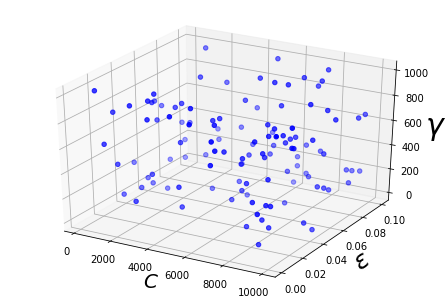






Experiment # 1: done. MSE_g_Best: 249.154231; MSE_AV: 324.888799; MSE_MD: 276.711010; MSE_k_AV: 249.659497; MSE_k_MD: 251.968174


Experiment # 2: done. MSE_g_Best: 249.468119; MSE_AV: 392.031211; MSE_MD: 291.519190; MSE_k_AV: 251.457022; MSE_k_MD: 252.373247


Experiment # 3: done. MSE_g_Best: 249.259201; MSE_AV: 343.696613; MSE_MD: 282.838814; MSE_k_AV: 252.245088; MSE_k_MD: 250.531206


Experiment # 4: done. MSE_g_Best: 249.013968; MSE_AV: 323.751434; MSE_MD: 276.864069; MSE_k_AV: 252.122730; MSE_k_MD: 257.664133


Experiment # 5: done. MSE_g_Best: 248.905514; MSE_AV: 377.999967; MSE_MD: 292.399891; MSE_k_AV: 250.838193; MSE_k_MD: 250.497753



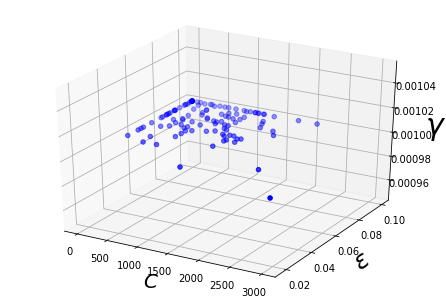






Mean Squared Error for the ARIMA Model:	 1181.957409

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 248.905514

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 377.999967

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 250.838193

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 292.399891

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 250.497753

Best Configuration Found:

SVR(C=647.3017646650898, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.08217042351389181, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



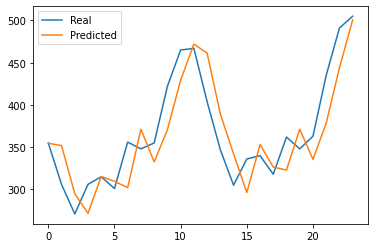


Ensemble Model series` predicitions:



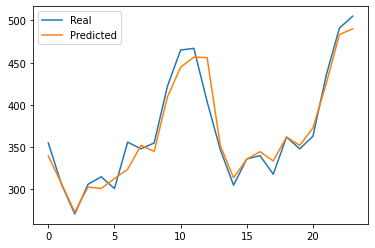


Ensemble Model best Average series` predicitions:



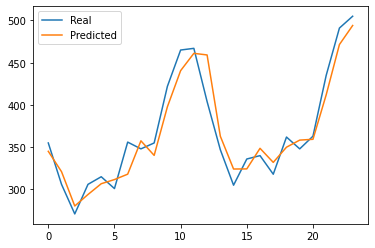


Ensemble Model K best Average series` predicitions:



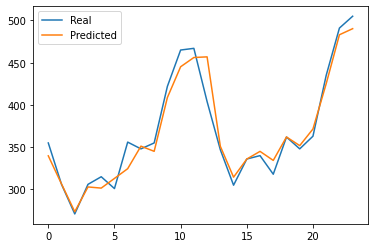


Ensemble Model best Median series` predicitions:



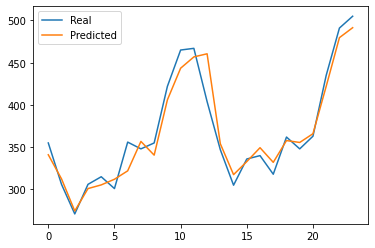


Ensemble Model K best Median series` predicitions:



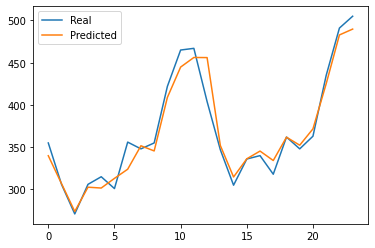






Best Result: Experiment # 5 . Mean Squared Error = 248.905514



In [0]:
pso(120, 100, 3, 1, 5, 5)

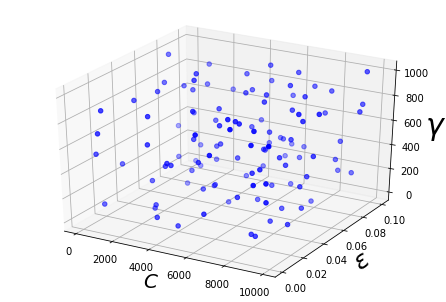






Experiment # 1: done. MSE_g_Best: 249.076261; MSE_AV: 388.903271; MSE_MD: 296.338004; MSE_k_AV: 254.126105; MSE_k_MD: 255.290834


Experiment # 2: done. MSE_g_Best: 248.703969; MSE_AV: 354.557114; MSE_MD: 287.348187; MSE_k_AV: 251.589543; MSE_k_MD: 252.896793


Experiment # 3: done. MSE_g_Best: 239.675255; MSE_AV: 392.026732; MSE_MD: 301.970210; MSE_k_AV: 247.872597; MSE_k_MD: 259.549095


Experiment # 4: done. MSE_g_Best: 248.818820; MSE_AV: 369.639261; MSE_MD: 284.927682; MSE_k_AV: 250.003476; MSE_k_MD: 253.183430


Experiment # 5: done. MSE_g_Best: 248.872881; MSE_AV: 379.542533; MSE_MD: 282.433423; MSE_k_AV: 251.459601; MSE_k_MD: 251.406664



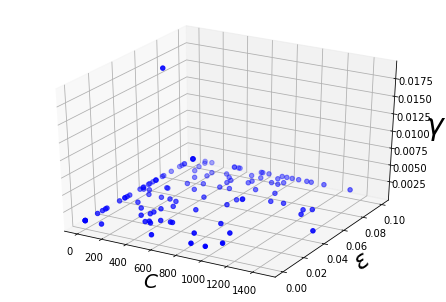






Mean Squared Error for the ARIMA Model:	 1181.957409

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 239.675255

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 392.026732

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 247.872597

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 301.970210

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 259.549095

Best Configuration Found:

SVR(C=12.572784684153614, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.04529446807083337, gamma=0.061937467070556834, kernel='rbf',
    max_iter=-1, shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



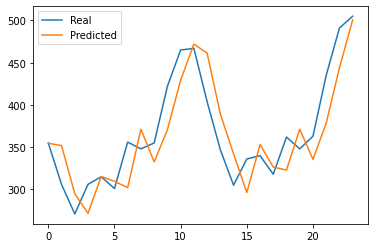


Ensemble Model series` predicitions:



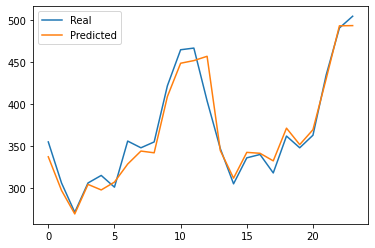


Ensemble Model best Average series` predicitions:



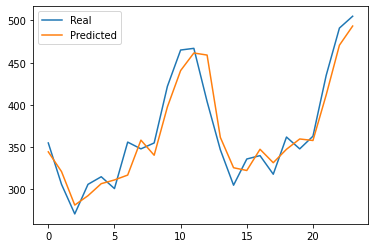


Ensemble Model K best Average series` predicitions:



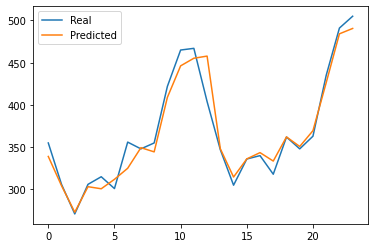


Ensemble Model best Median series` predicitions:



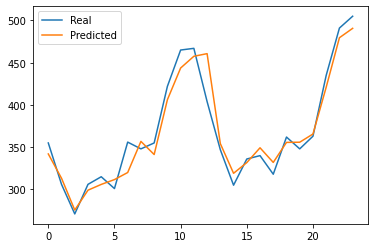


Ensemble Model K best Median series` predicitions:



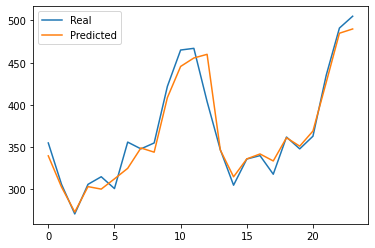






Best Result: Experiment # 3 . Mean Squared Error = 239.675255



In [0]:
pso(120, 100, 3, 1, 10, 5)

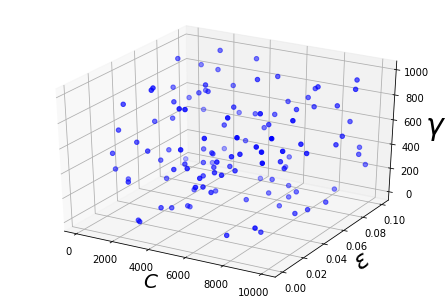






Experiment # 1: done. MSE_g_Best: 249.372665; MSE_AV: 341.393111; MSE_MD: 283.216419; MSE_k_AV: 251.673721; MSE_k_MD: 254.569710


Experiment # 2: done. MSE_g_Best: 249.194118; MSE_AV: 391.590066; MSE_MD: 296.730135; MSE_k_AV: 251.712916; MSE_k_MD: 254.770347


Experiment # 4: done. MSE_g_Best: 249.258925; MSE_AV: 368.449673; MSE_MD: 294.523033; MSE_k_AV: 252.374703; MSE_k_MD: 252.929274


Experiment # 5: done. MSE_g_Best: 249.102649; MSE_AV: 333.411725; MSE_MD: 280.884227; MSE_k_AV: 251.200212; MSE_k_MD: 256.158079



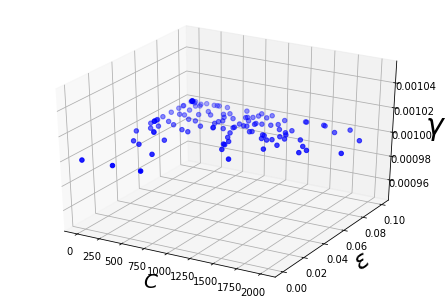






Mean Squared Error for the ARIMA Model:	 1181.957409

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 249.102649

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 333.411725

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 251.200212

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 280.884227

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 256.158079

Best Configuration Found:

SVR(C=634.5112762826242, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.08232424181946617, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



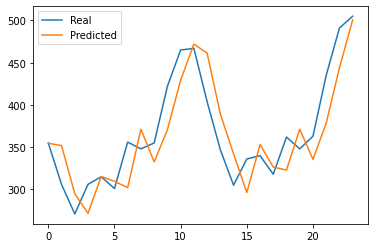


Ensemble Model series` predicitions:



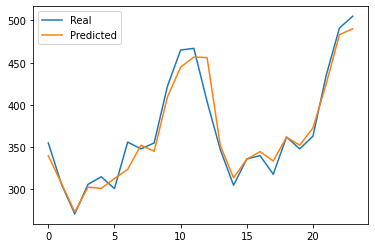


Ensemble Model best Average series` predicitions:



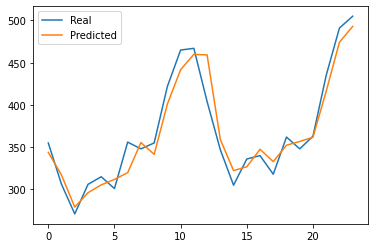


Ensemble Model K best Average series` predicitions:



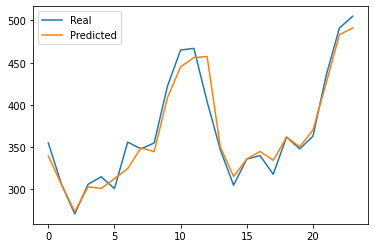


Ensemble Model best Median series` predicitions:



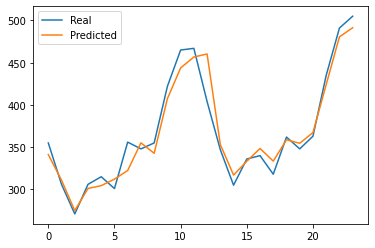


Ensemble Model K best Median series` predicitions:



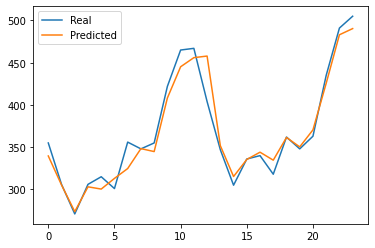






Best Result: Experiment # 5 . Mean Squared Error = 249.102649



In [0]:
pso(120, 100, 3, 1, 20, 5)

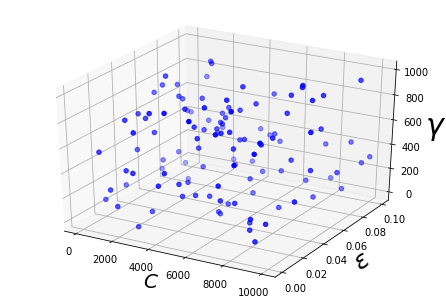






Experiment # 1: done. MSE_g_Best: 249.157878; MSE_AV: 353.090498; MSE_MD: 280.602505; MSE_k_AV: 252.325449; MSE_k_MD: 255.091706


Experiment # 2: done. MSE_g_Best: 249.175141; MSE_AV: 387.461357; MSE_MD: 286.166608; MSE_k_AV: 252.580254; MSE_k_MD: 256.458592


Experiment # 3: done. MSE_g_Best: 249.414551; MSE_AV: 387.104097; MSE_MD: 298.966204; MSE_k_AV: 253.318497; MSE_k_MD: 256.107135


Experiment # 4: done. MSE_g_Best: 249.237099; MSE_AV: 376.041814; MSE_MD: 288.326304; MSE_k_AV: 253.317799; MSE_k_MD: 256.678459


Experiment # 5: done. MSE_g_Best: 249.164415; MSE_AV: 336.896514; MSE_MD: 278.402134; MSE_k_AV: 252.601708; MSE_k_MD: 256.352959



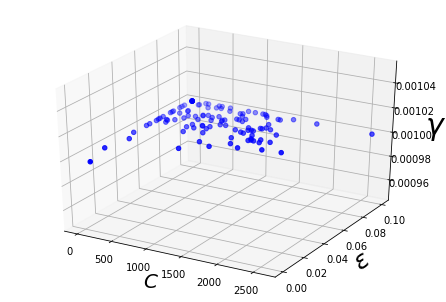






Mean Squared Error for the ARIMA Model:	 1181.957409

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 249.157878

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 353.090498

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 252.325449

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 280.602505

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 255.091706

Best Configuration Found:

SVR(C=679.0150337068798, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.08257126633143634, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



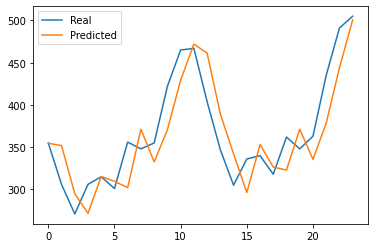


Ensemble Model series` predicitions:



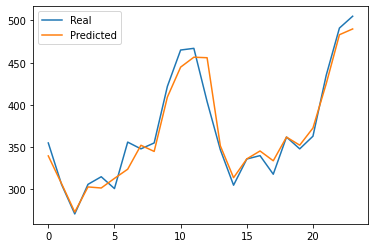


Ensemble Model best Average series` predicitions:



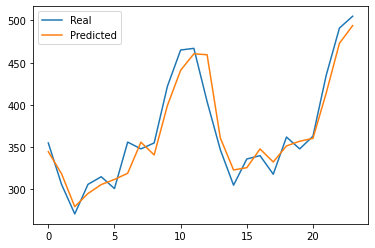


Ensemble Model K best Average series` predicitions:



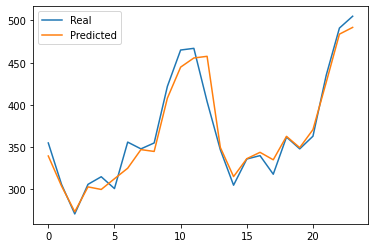


Ensemble Model best Median series` predicitions:



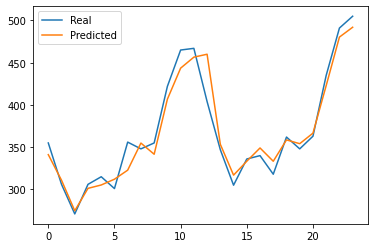


Ensemble Model K best Median series` predicitions:



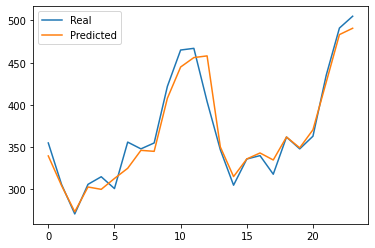






Best Result: Experiment # 1 . Mean Squared Error = 249.157878



In [0]:
pso(120, 100, 3, 1, 30, 5)

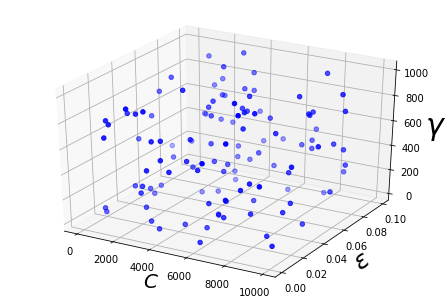






Experiment # 1: done. MSE_g_Best: 249.053329; MSE_AV: 360.876345; MSE_MD: 290.231622; MSE_k_AV: 251.809788; MSE_k_MD: 254.977604


Experiment # 2: done. MSE_g_Best: 248.818586; MSE_AV: 340.929749; MSE_MD: 278.765282; MSE_k_AV: 253.722523; MSE_k_MD: 256.488298


Experiment # 3: done. MSE_g_Best: 249.172704; MSE_AV: 356.331305; MSE_MD: 293.821614; MSE_k_AV: 252.065570; MSE_k_MD: 257.197651


Experiment # 4: done. MSE_g_Best: 248.911713; MSE_AV: 374.598027; MSE_MD: 289.374525; MSE_k_AV: 251.684073; MSE_k_MD: 255.968256


Experiment # 5: done. MSE_g_Best: 219.965283; MSE_AV: 509.519962; MSE_MD: 424.571014; MSE_k_AV: 250.994516; MSE_k_MD: 246.931553



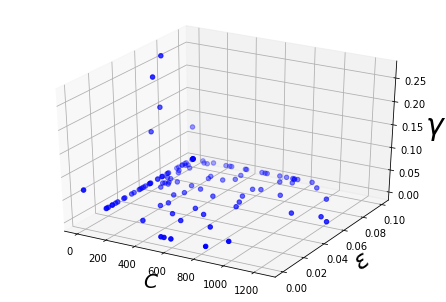






Mean Squared Error for the ARIMA Model:	 1181.957409

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 219.965283

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 509.519962

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 250.994516

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 424.571014

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 246.931553

Best Configuration Found:

SVR(C=18.562008824331603, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.06875779902651906, gamma=0.18499715070625244, kernel='rbf',
    max_iter=-1, shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



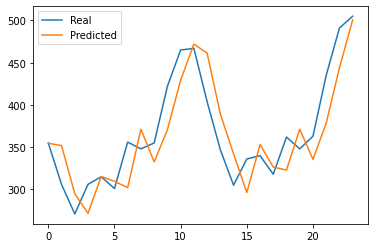


Ensemble Model series` predicitions:



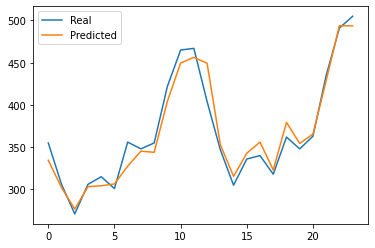


Ensemble Model best Average series` predicitions:



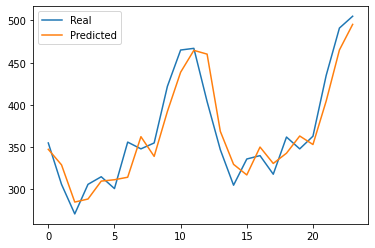


Ensemble Model K best Average series` predicitions:



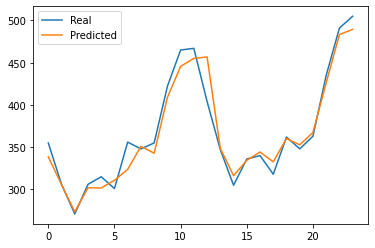


Ensemble Model best Median series` predicitions:



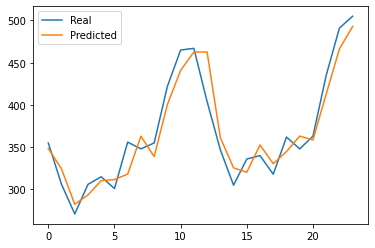


Ensemble Model K best Median series` predicitions:



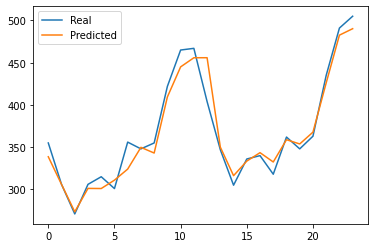






Best Result: Experiment # 5 . Mean Squared Error = 219.965283



In [0]:
pso(120, 100, 3, 1, 40, 5)

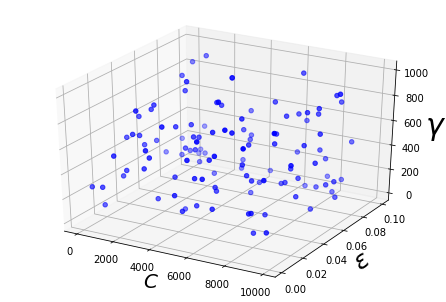






Experiment # 1: done. MSE_g_Best: 249.230045; MSE_AV: 328.608870; MSE_MD: 278.001703; MSE_k_AV: 254.738135; MSE_k_MD: 258.536621


Experiment # 2: done. MSE_g_Best: 249.267031; MSE_AV: 341.709055; MSE_MD: 289.575059; MSE_k_AV: 253.448867; MSE_k_MD: 253.569066


Experiment # 3: done. MSE_g_Best: 249.219925; MSE_AV: 357.337608; MSE_MD: 287.295097; MSE_k_AV: 252.874771; MSE_k_MD: 258.377563


Experiment # 4: done. MSE_g_Best: 249.061492; MSE_AV: 351.052215; MSE_MD: 287.419084; MSE_k_AV: 255.390005; MSE_k_MD: 259.405206


Experiment # 5: done. MSE_g_Best: 249.239861; MSE_AV: 356.051353; MSE_MD: 291.869144; MSE_k_AV: 251.771277; MSE_k_MD: 259.790175



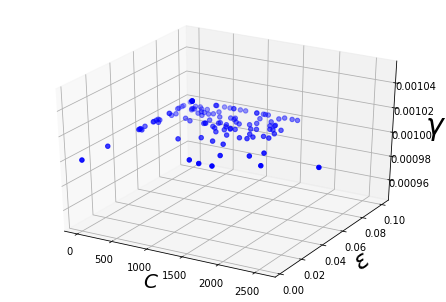






Mean Squared Error for the ARIMA Model:	 1181.957409

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 249.061492

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 351.052215

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 255.390005

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 287.419084

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 259.405206

Best Configuration Found:

SVR(C=643.7328097558136, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.08262362011556282, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



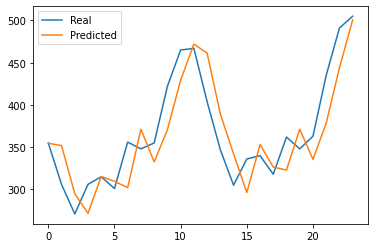


Ensemble Model series` predicitions:



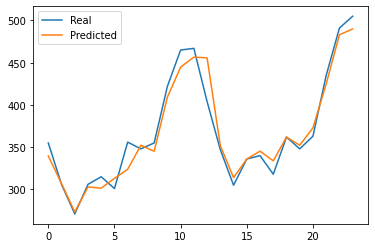


Ensemble Model best Average series` predicitions:



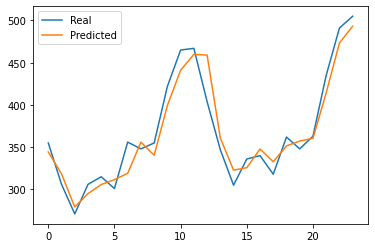


Ensemble Model K best Average series` predicitions:



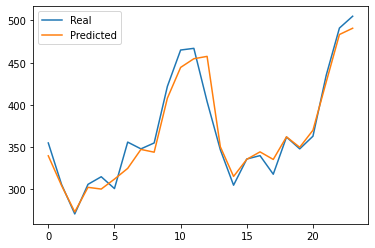


Ensemble Model best Median series` predicitions:



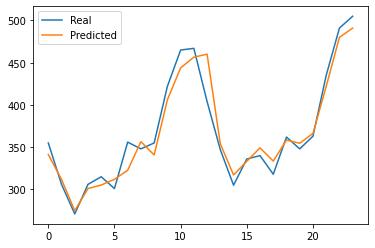


Ensemble Model K best Median series` predicitions:



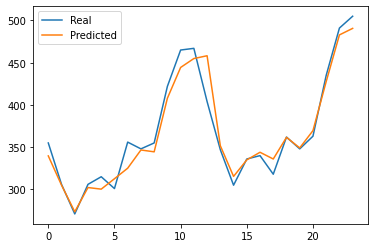






Best Result: Experiment # 4 . Mean Squared Error = 249.061492



In [0]:
pso(120, 100, 3, 1, 50, 5)

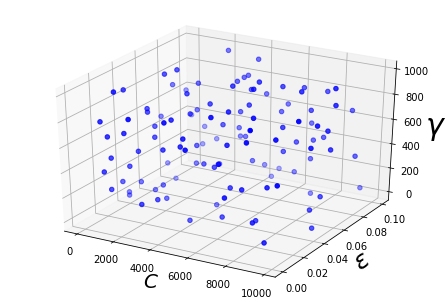






Experiment # 1: done. MSE_g_Best: 249.026162; MSE_AV: 351.332804; MSE_MD: 292.303504; MSE_k_AV: 253.923163; MSE_k_MD: 258.255550


Experiment # 2: done. MSE_g_Best: 249.124143; MSE_AV: 333.648614; MSE_MD: 278.381815; MSE_k_AV: 253.303492; MSE_k_MD: 258.804860


Experiment # 3: done. MSE_g_Best: 248.809707; MSE_AV: 363.626394; MSE_MD: 294.957843; MSE_k_AV: 254.214221; MSE_k_MD: 255.130514


Experiment # 4: done. MSE_g_Best: 249.200295; MSE_AV: 376.773538; MSE_MD: 287.926049; MSE_k_AV: 252.704322; MSE_k_MD: 258.329452


Experiment # 5: done. MSE_g_Best: 248.928611; MSE_AV: 333.556102; MSE_MD: 280.440622; MSE_k_AV: 253.098051; MSE_k_MD: 256.137130



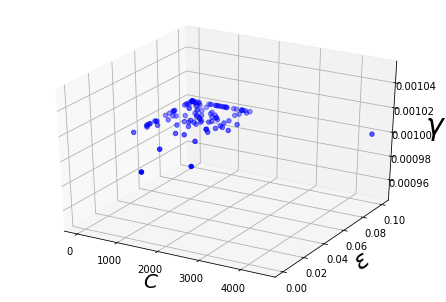






Mean Squared Error for the ARIMA Model:	 1181.957409

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 248.809707

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 363.626394

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 254.214221

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 294.957843

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 255.130514

Best Configuration Found:

SVR(C=637.3683044199206, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.08248736834864784, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



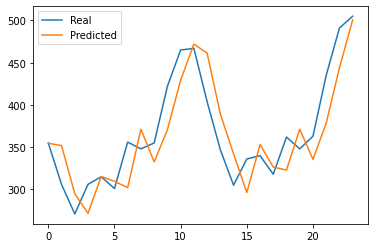


Ensemble Model series` predicitions:



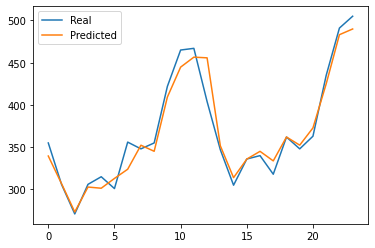


Ensemble Model best Average series` predicitions:



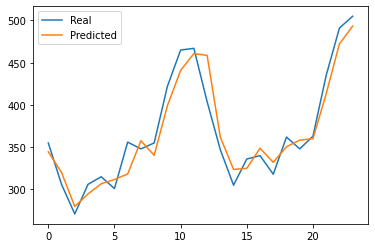


Ensemble Model K best Average series` predicitions:



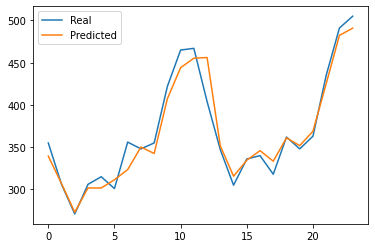


Ensemble Model best Median series` predicitions:



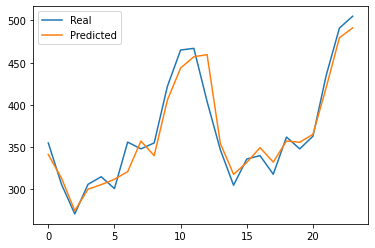


Ensemble Model K best Median series` predicitions:



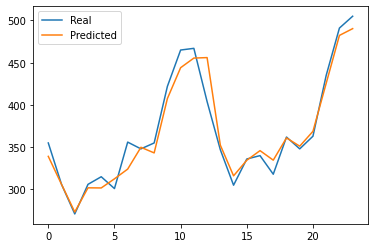






Best Result: Experiment # 3 . Mean Squared Error = 248.809707



In [43]:
pso(120, 100, 3, 1, 60, 5)